# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 589


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url =  url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tranovaho
City not found. Skipping...
Processing Record 2 of Set 1 | mikhaylovskoye
Processing Record 3 of Set 1 | grytviken
Processing Record 4 of Set 1 | darazo
Processing Record 5 of Set 1 | adamstown
Processing Record 6 of Set 1 | taiohae
City not found. Skipping...
Processing Record 7 of Set 1 | ust-nera
Processing Record 8 of Set 1 | puerto natales
Processing Record 9 of Set 1 | blackmans bay
Processing Record 10 of Set 1 | magaria
Processing Record 11 of Set 1 | waitangi
Processing Record 12 of Set 1 | yellowknife
Processing Record 13 of Set 1 | leava
Processing Record 14 of Set 1 | nova sintra
Processing Record 15 of Set 1 | new norfolk
Processing Record 16 of Set 1 | nar'yan-mar
Processing Record 17 of Set 1 | new romney
Processing Record 18 of Set 1 | college
Processing Record 19 of Set 1 | weno
Processing Record 20 of Set 1 | laguna
Processing Record 21 of Set 1 | faranah
Processing Re

In [5]:
print(city_lat)

48.1002


In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          562
Lat           562
Lng           562
Max Temp      562
Humidity      562
Cloudiness    562
Wind Speed    562
Country       562
Date          562
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,mikhaylovskoye,51.8239,79.7172,-13.65,73,100,7.11,RU,1707717853
1,grytviken,-54.2811,-36.5092,5.46,78,3,3.81,GS,1707717854
2,darazo,10.9938,10.4118,19.11,15,1,2.50,NG,1707717854
3,adamstown,-25.0660,-130.1015,24.90,90,45,8.35,PN,1707717854
4,ust-nera,64.5667,143.2000,-35.40,99,84,1.05,RU,1707717854


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,mikhaylovskoye,51.8239,79.7172,-13.65,73,100,7.11,RU,1707717853
1,grytviken,-54.2811,-36.5092,5.46,78,3,3.81,GS,1707717854
2,darazo,10.9938,10.4118,19.11,15,1,2.50,NG,1707717854
3,adamstown,-25.0660,-130.1015,24.90,90,45,8.35,PN,1707717854
4,ust-nera,64.5667,143.2000,-35.40,99,84,1.05,RU,1707717854


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

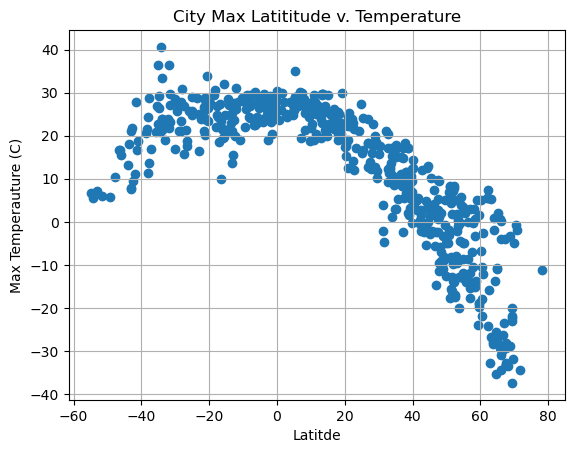

In [10]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"])

# Incorporate the other graph properties
plt.xlabel('Latitde')
plt.ylabel('Max Temperauture (C)')
plt.title('City Max Latititude v. Temperature')
plt.grid(True)
# Save the figure

plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

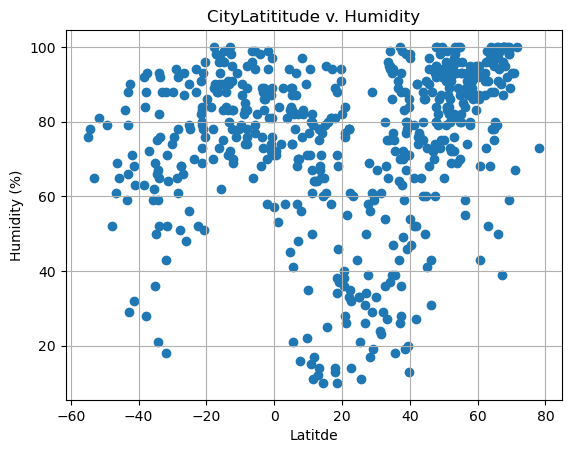

In [71]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"])

# Incorporate the other graph properties
plt.xlabel('Latitde')
plt.ylabel('Humidity (%)')
plt.title('Humitity of City Latitudes')
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

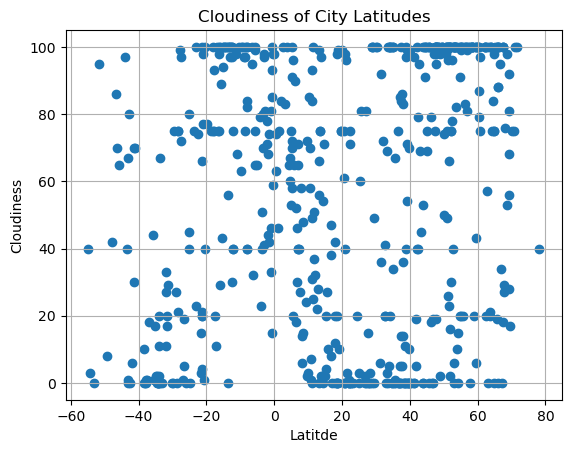

In [72]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"])

# Incorporate the other graph properties
plt.xlabel('Latitde')
plt.ylabel('Cloudiness')
plt.title('Cloudiness of City Latitudes')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

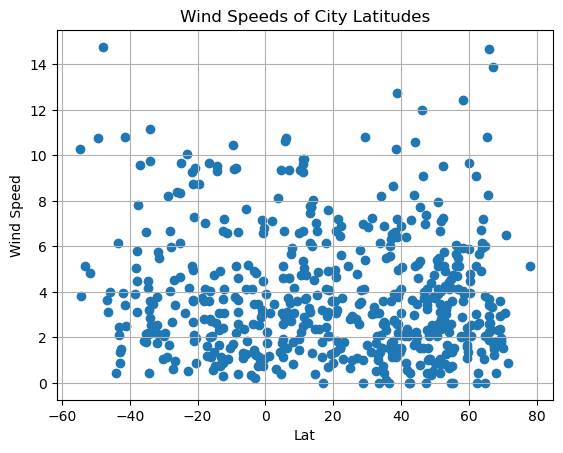

In [73]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"])

# Incorporate the other graph properties
plt.xlabel('Lat')
plt.ylabel('Wind Speed')
plt.title('Wind Speeds of City Latitudes')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [3]:
# Define a function to create Linear Regression plots

def plots(y_values, y_label, title ):
    x_values = city_data_df['Lat']
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


    

NameError: name 'plt' is not defined

In [75]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df= city_data_df.loc[(city_data_df['Lat']>=0)]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,mikhaylovskoye,51.8239,79.7172,-13.65,73,100,7.11,RU,1707717853
2,darazo,10.9938,10.4118,19.11,15,1,2.50,NG,1707717854
4,ust-nera,64.5667,143.2000,-35.40,99,84,1.05,RU,1707717854
7,magaria,12.9983,8.9099,19.57,12,28,3.28,NE,1707717855
9,yellowknife,62.4560,-114.3525,-15.71,96,20,0.00,CA,1707717721


In [76]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df= city_data_df.loc[(city_data_df['Lat']<0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,grytviken,-54.2811,-36.5092,5.46,78,3,3.81,GS,1707717854
3,adamstown,-25.0660,-130.1015,24.90,90,45,8.35,PN,1707717854
5,puerto natales,-51.7236,-72.4875,6.03,81,95,4.83,CL,1707717854
6,blackmans bay,-43.0167,147.3167,21.07,66,67,0.89,AU,1707717854
8,waitangi,-43.9535,-176.5597,13.23,83,97,0.45,NZ,1707717855


###  Temperature vs. Latitude Linear Regression Plot

In [1]:
y_values = northern_hemi_df['Max Temp']
plots(y_values, 'Temp', 'no')

NameError: name 'northern_hemi_df' is not defined

The r-squared is: 0.7932566912847648


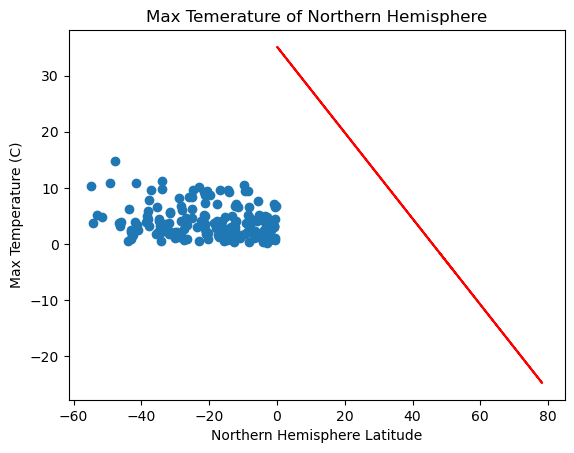

In [77]:
# Linear regression on Northern Hemisphere
x_values= northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_value,y_value)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Northern Hemisphere Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('Max Temerature of Northern Hemisphere')
print(f"The r-squared is: {rvalue**2}")
plt.show()


The r-squared is: 0.24569636130989042


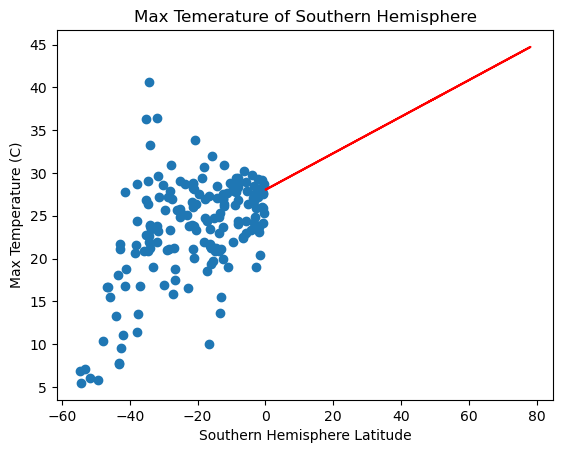

In [78]:
# Linear regression on Southern Hemisphere
xvalue = southern_hemi_df["Lat"]
yvalue = southern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(xvalue, yvalue)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(xvalue,yvalue)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Southern Hemisphere Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('Max Temerature of Southern Hemisphere')
print(f"The r-squared is: {rvalue**2}")
plt.show()



**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.24569636130989042


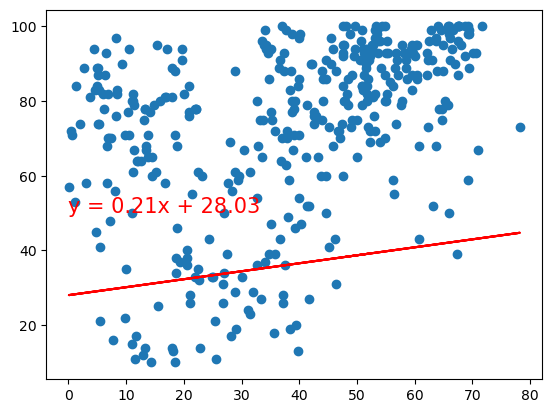

In [95]:
# Northern Hemisphere
x_value = northern_hemi_df["Lat"]
y_value = northern_hemi_df["Humidity"]
plt.scatter(x_value,y_value)
(slope, intercept, rvalue, pvalue, stderr) = linregress(xvalue, yvalue)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.plot(x_values,regress_values,"r-")
print(f"The r-squared is: {rvalue**2}")


The r-squared is: 0.24569636130989042


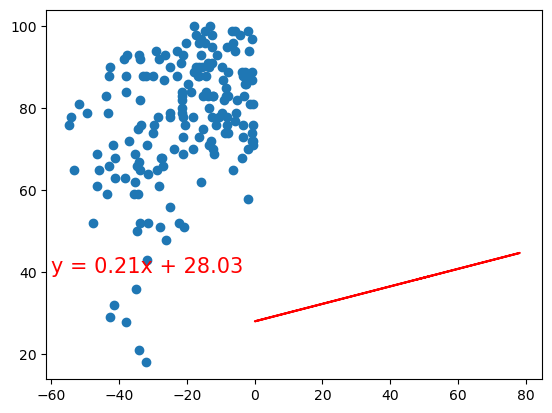

In [96]:
# Southern Hemisphere
x_value = southern_hemi_df["Lat"]
y_value = southern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(xvalue, yvalue)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(-60,40),fontsize=15,color="red")
plt.plot(x_values,regress_values,"r-")
plt.scatter(x_value,y_value)
print(f"The r-squared is: {rvalue**2}")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.24569636130989042


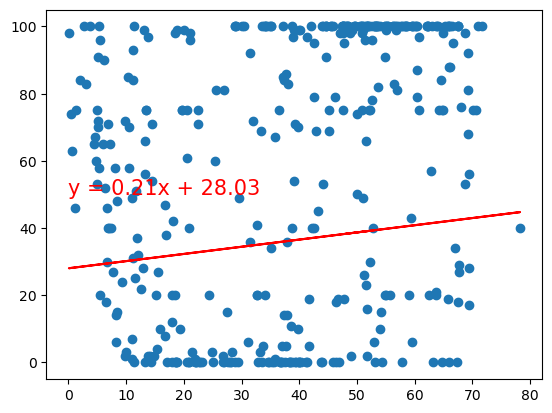

In [93]:
# Northern Hemisphere
x_value = northern_hemi_df["Lat"]
y_value = northern_hemi_df["Cloudiness"]
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
(slope, intercept, rvalue, pvalue, stderr) = linregress(xvalue, yvalue)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.scatter(x_value,y_value)
print(f"The r-squared is: {rvalue**2}")

The r-squared is: 0.24569636130989042


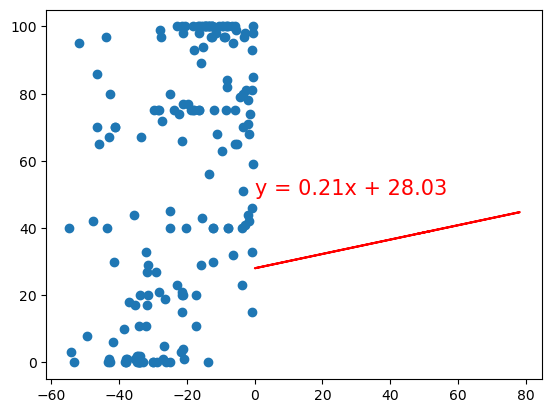

In [94]:
# Southern Hemisphere
x_value = southern_hemi_df["Lat"]
y_value = southern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(xvalue, yvalue)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.plot(x_values,regress_values,"r-")
plt.scatter(x_value,y_value)
print(f"The r-squared is: {rvalue**2}")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.24569636130989042


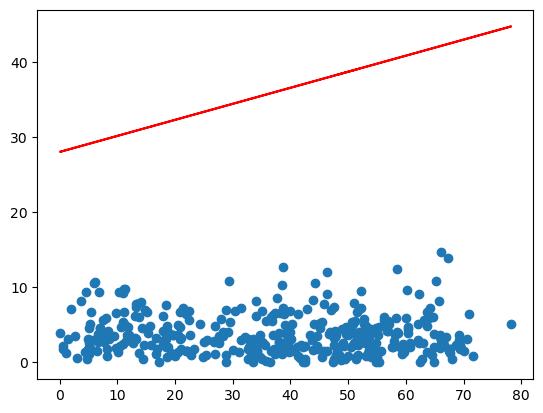

In [90]:
# Northern Hemisphere
x_value = northern_hemi_df["Lat"]
y_value = northern_hemi_df["Wind Speed"]
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.plot(x_values,regress_values,"r-")

plt.scatter(x_value,y_value)
print(f"The r-squared is: {rvalue**2}")

The r-squared is: 0.24569636130989042


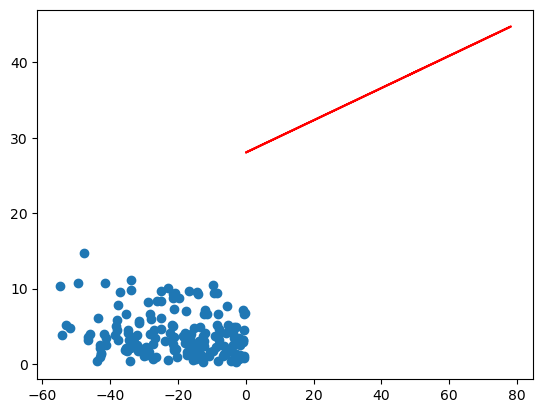

In [86]:
# Southern Hemisphere
x_value = southern_hemi_df["Lat"]
y_value = southern_hemi_df["Wind Speed"]
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.plot(x_values,regress_values,"r-")
plt.scatter(x_value,y_value)
print(f"The r-squared is: {rvalue**2}")

**Discussion about the linear relationship:** YOUR RESPONSE HERE